We wish to efficiently perform comparisons in order to approximate a division of the samples into those above and below 50th percentile along some comparative hypothesis. We conduct a Monte-Carlo simulation of a strategy in which we pair together samples in *rounds* and compare them. Crucially, in each "round," we only compare samples with the same "record" thus far (e.g. WLWW). This simulation suggests that for reasonable confidence thresholds such as .90, even "WW" can be confidently classified as in the upper half of the samples. The collection of records that 

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import zip_longest
from collections import Counter
import json

In [51]:
# generate samples
expo = 22
total_samples = np.power(2, 22)
samples = np.random.uniform(size=total_samples)

In [52]:
def split(samples):
    """Splits the samples into the top and bottom halves."""
    np.random.shuffle(samples) # shuffle samples
    samples_a, samples_b = samples[1::2], samples[::2]

    top, bottom = [], []
    for a, b in zip_longest(samples_a, samples_b):
        if not b: # in case odd
            b = np.random.choice(samples_b) # pick random sample
            top.append(a) if a > b else bottom.append(a)
        if a < b:
            top.append(b), bottom.append(a)
        else:
            top.append(a), bottom.append(b)
    return np.array(top), np.array(bottom)

In [53]:
dists = dict()
dists[0] = {'':samples}

def prop_top(dist):
    return sum(dist > 0.5)/len(dist)

In [61]:
cutoff = .90
safe_prefixes = dict()

num_comparisons = Counter()
num_classified = Counter()

for i in range(1, 18): # about 250k
    dists[i] = {}
    for record, dist_to_split in dists[i-1].items():
        prop = prop_top(dist_to_split)
        if max(prop, 1-prop) > cutoff:
            num_classified[i-1] += len(dist_to_split)
            safe_prefixes[record] = prop
            continue
        num_comparisons[i] += len(dist_to_split)
        lesser, greater = split(dist_to_split)
        dists[i][record + '0'] = lesser
        dists[i][record + '1'] = greater

In [62]:
with open('../data/prefixes_99.json', 'w') as f:
    json.dump(safe_prefixes, f)

Text(0.5, 0, 'Round')

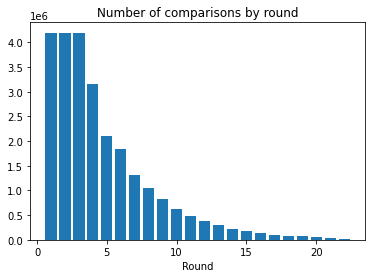

In [ ]:
plt.bar(*zip(*sorted(num_comparisons.items())))
plt.title('Number of comparisons by round')
plt.xlabel('Round')

Text(0.5, 0, 'Round')

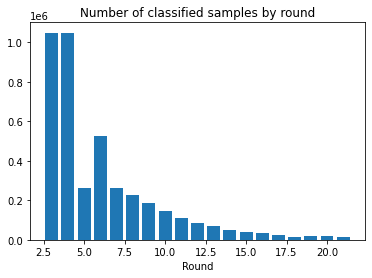

In [ ]:
plt.bar(*zip(*sorted(num_classified.items())))
plt.title('Number of classified samples by round')
plt.xlabel('Round')